<a href="https://colab.research.google.com/github/degumuse5/CMSC421-Project/blob/main/CMSC421%20AI%20MAZE%20Solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Maze Logistic**
The maze is a 2d array which has walls ("W") and path ("O"), starting point ("S") and finsh point("X"). The maze will not just have one solution but multiple solution's, shortest or longest will be determined by the algorims we use.


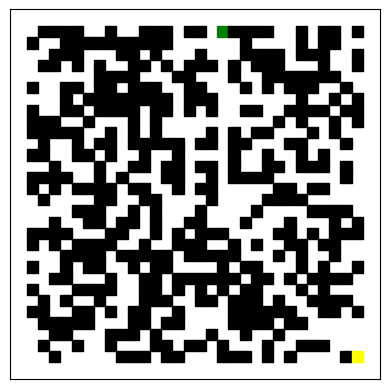

In [ ]:
import random
def random_edge_cell(width, height):
    if width < 1 or height < 1:
        raise ValueError("Width and height must be at least 1")

    # Choose a random side: top (0), bottom (1), left (2), right (3)
    side = random.randint(0, 3)

    if side == 0:
        # Top row
        return (0, random.randint(0, width - 1))
    elif side == 1:
        # Bottom row
        return (height - 1, random.randint(0, width - 1))
    elif side == 2:
        # Left column
        return (random.randint(0, height - 1), 0)
    elif side == 3:
        # Right column
        return (random.randint(0, height - 1), width - 1)
import matplotlib.pyplot as plt
# Carve a path just incase maze with no solution is created, since the states are randomly placed
def create_random_path(point1, point2):
    # Unpack the points
    x1, y1 = point1
    x2, y2 = point2

    # Path list starts with the initial point
    path = [point1]

    # Current position
    current_x, current_y = x1, y1

    # Move step by step towards the target
    while (current_x, current_y) != (x2, y2):
        if current_x != x2:
            # Move in x direction
            step_x = 1 if x2 > current_x else -1
            if random.choice([True, False]):  # Randomly choose to move in x if possible
                current_x += step_x
                path.append((current_x, current_y))
                continue  # Skip the y movement in this iteration
        if current_y != y2:
            # Move in y direction
            step_y = 1 if y2 > current_y else -1
            current_y += step_y
            path.append((current_x, current_y))

    return path
def generate_maze(width, height):
    maze = [['W' for _ in range(width)] for _ in range(height)]
    start = (0,0);
    finish = (0,0);
    while start == finish:
      start = random_edge_cell(width, height)
      finish = random_edge_cell(width, height)
    path = create_random_path(start, finish)
    maze[start[0]][start[1]] = 'S'
    maze[finish[0]][finish[1]] = 'X'

    # Carve the path in the maze, replacing 'o' with random numbers
    for (x, y) in path:
        if (x, y) != start and (x, y) != finish:
            maze[x][y] = 1 # Random number between 0 and 10

    # Randomly add openings, avoiding start and finish, with random numbers
    for _ in range(int((width * height) * 0.7)):  # Adding openings to about 90% of the maze area
        x, y = random.randint(0, width-1), random.randint(0, height-1)
        if (x, y) != start and (x, y) != finish:
            maze[x][y] = 1 # Random number 1

    return maze, start, finish
def print_maze_with_path_and_visited(maze, path, visited):
    path_set = set(path) if path else set()
    for x in range(len(maze)):
        row = ''
        for y in range(len(maze[0])):
            if (x, y) in path_set:
                row += 'P '  # Mark path
            elif (x, y) in visited:
                row += 'V '  # Mark visited
            else:
                row += str(maze[x][y]) + ' '
        print(row)

def print_maze(maze):
    for row in maze:
        print(' '.join(str(row)))
def plot_maze(maze, path=None, visited=None):
    fig, ax = plt.subplots()
    for x in range(len(maze)):
        for y in range(len(maze[0])):
            if maze[x][y] == 'W':
                ax.fill_between([y, y+1], x, x+1, color='black')
            elif (x, y) == start:
                ax.fill_between([y, y+1], x, x+1, color='yellow')  # Start
            elif (x, y) == finish:
                ax.fill_between([y, y+1], x, x+1, color='green')  # Finish
            elif path and (x, y) in path:
                ax.fill_between([y, y+1], x, x+1, color='blue')  # Path
            elif visited and (x, y) in visited:
                ax.fill_between([y, y+1], x, x+1, color='gray')  # Visited

    ax.invert_yaxis()  # Invert the Y axis so the [0,0] is in the top-left corner
    ax.set_aspect('equal')
    plt.xticks([])
    plt.yticks([])
    plt.show()
maze, start, finish = generate_maze(30, 30)
plot_maze(maze)

### ****

### **Depth First Search Algorithim**
DFS begins at a chosen node (the "root" if the graph is a tree) and explores as far along each branch as possible before backtracking. The maze's starting point is given to the fucntion, then DFS is performed which tries ever possible move to reach the end point(goal).

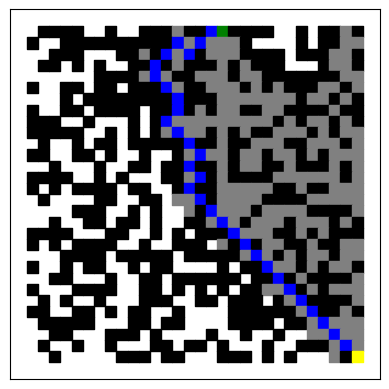

In [ ]:
def dfs_maze(maze, start, finish):
    # Directions for moving in the maze: right, left, down, up
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0),(1,1),(1,-1),(-1,1),(-1,-1)]
    width = len(maze[0])
    height = len(maze)

    # Stack for DFS with initial point
    stack = [(start, [start])]  # (current_position, path_so_far)

    # Set to track visited positions
    visited = set()
    visited.add(start)

    while stack:
        (current_x, current_y), path = stack.pop()

        # Check if we've reached the finish
        if (current_x, current_y) == finish:
            return path, visited

        # Explore neighbors
        for dx, dy in directions:
            next_x, next_y = current_x + dx, current_y + dy
            if 0 <= next_x < height and 0 <= next_y < width:  # Check maze boundaries
                if maze[next_x][next_y] != 'W' and (next_x, next_y) not in visited:  # Check if it's walkable and not visited
                    visited.add((next_x, next_y))
                    stack.append(((next_x, next_y), path + [(next_x, next_y)]))

    return None  # Return None if no path is found

# Example usage:
path, visited = dfs_maze(maze, start, finish)

plot_maze(maze, path, visited)

### **Breadth First Search Algorithim**


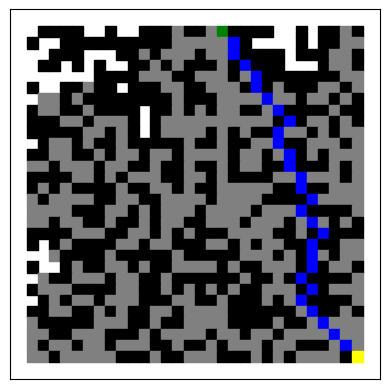

In [ ]:
import random
import matplotlib.pyplot as plt
from collections import deque
def bfs_maze(maze, start, finish):
    # Directions for moving in the maze: right, left, down, up
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0),(1,1),(1,-1),(-1,1),(-1,-1)]
    width = len(maze[0])
    height = len(maze)

    # Queue for BFS with initial point
    queue = deque([(start, [start])])  # (current_position, path_so_far)

    # Set to track visited positions
    visited = set()
    visited.add(start)

    while queue:
        (current_x, current_y), path = queue.popleft()

        # Check if we've reached the finish
        if (current_x, current_y) == finish:
            return path, visited

        # Explore neighbors
        for dx, dy in directions:
            next_x, next_y = current_x + dx, current_y + dy
            if 0 <= next_x < height and 0 <= next_y < width:  # Check maze boundaries
                if maze[next_x][next_y] != 'W' and (next_x, next_y) not in visited:  # Check if it's walkable and not visited
                    visited.add((next_x, next_y))
                    queue.append(((next_x, next_y), path + [(next_x, next_y)]))

    return None, visited  # Return None if no path is found

# Example usage:
path, visited = bfs_maze(maze, start, finish)

plot_maze(maze, path, visited)

### **Unifrom Cost Search**

Lowest Cost from Start to Goal: 28


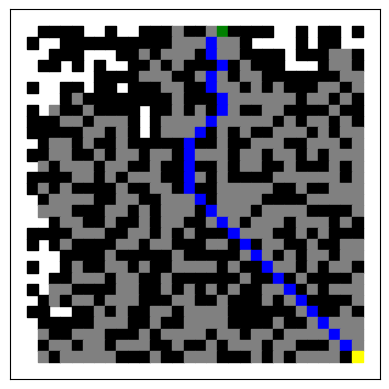

In [ ]:
import heapq

def uniform_cost_search_with_path(grid, start, finish):
    n = len(grid)
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0),(1,1),(1,-1),(-1,1),(-1,-1)]
    pq = [(0, start)]
    visited = set()
    visited.add(start)
    came_from = {start: None}  # Tracks predecessors of each node for path reconstruction

    while pq:
        current_cost, (x, y) = heapq.heappop(pq)

        if (x, y) == finish:
            # Reconstruct the path backward
            path = []
            node = finish
            while node is not None:
                path.append(node)
                node = came_from[node]
            return current_cost, path[::-1], visited  # Reverse the path to return from start to finish

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < n and 0 <= ny < n and grid[nx][ny] != 'W':
                if (nx, ny) not in visited:
                    visited.add((nx, ny))
                    new_cost = current_cost + (grid[nx][ny] if isinstance(grid[nx][ny], int) else 0)
                    heapq.heappush(pq, (new_cost, (nx, ny)))
                    came_from[(nx, ny)] = (x, y)

    return float('inf'), []  # If no path is found, return empty path



cost, path, visited = uniform_cost_search_with_path(maze, start, finish)
print("Lowest Cost from Start to Goal:", cost)

plot_maze(maze, path, visited)

### **Informed Searches**

### **Greedy Search**

Lowest Cost from Start to Goal: 20.5
28


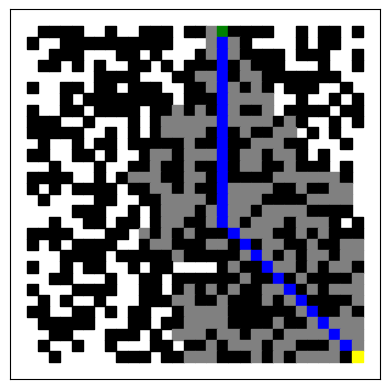

In [ ]:
import heapq
def manhattan_heuristic(cell, goal):
    return (abs(goal[1] - cell[1]) + abs(goal[0] - cell[0]))/2
def greedy(grid, start, finish):
    n = len(grid)
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0),(1,1),(1,-1),(-1,1),(-1,-1)]
    pq = [(0, start)]
    visited = set()
    visited.add(start)
    came_from = {start: None}  # Tracks predecessors of each node for path reconstruction

    while pq:
        current_her, (x, y) = heapq.heappop(pq)

        if (x, y) == finish:
            # Reconstruct the path backward
            path = []
            node = finish
            while node is not None:
                path.append(node)
                node = came_from[node]
            return manhattan_heuristic(start,finish), path[::-1], visited  # Reverse the path to return from start to finish

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < n and 0 <= ny < n and grid[nx][ny] != 'W':
                if (nx, ny) not in visited:
                    visited.add((nx, ny))
                    new_her = current_her + manhattan_heuristic((nx, ny),finish)
                    heapq.heappush(pq, (new_her, (nx, ny)))
                    came_from[(nx, ny)] = (x, y)

    return float('inf'), []  # If no path is found, return empty path



cost, path, visited = greedy(maze, start, finish)
print("Lowest Cost from Start to Goal:", cost)
total = 0
for d in path:
  total += (maze[d[0]][d[1]] if isinstance(maze[d[0]][d[1]], int) else 0)

print(total)

plot_maze(maze, path, visited)

### **A(star) Search**

0 


40 






39 






38 





37 



36 




35 




34 





33 



32 




31 




30 




29 





29 






29 





29 



29 


29 


29 


29 


29 



29 




29 





29 





29 





29 




29 




29 





29 






28 
Lowest Cost from Start to Goal: 28


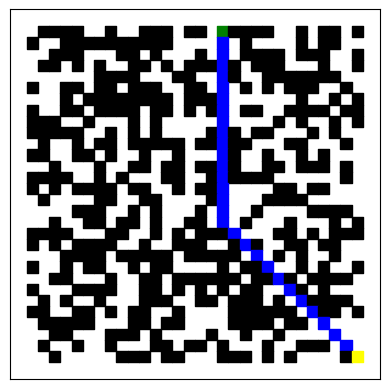

In [ ]:
import heapq
import math

# Manhattan heuristic function
def manhattan_heuristic(cell, goal):
    return (abs(goal[1] - cell[1]) + abs(goal[0] - cell[0]))

# A* Search function using the Manhattan heuristic
def a_star_search(grid, start, goal):
    n = len(grid)
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0),(1,1),(1,-1),(-1,1),(-1,-1)]  # Possible movements (up, down, right, left)
    priority_queue = [(0, start)]  # Start with a priority queue
    g_cost = {start: 0}  # Cumulative path cost from the start to each position
    came_from = {start: None}  # To reconstruct the path
    visited = set()

    while priority_queue:
        current_f, current = heapq.heappop(priority_queue)
        print(str(current_f)+" ")
        if current == goal:
            # Reconstruct path from goal to start
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            return g_cost[goal], path[::-1], visited  # Reverse the path to get it from start to goal

        visited.add(current)

        for dx, dy in directions:
            neighbor = (current[0] + dx, current[1] + dy)

            if 0 <= neighbor[0] < n and 0 <= neighbor[1] < n and grid[neighbor[0]][neighbor[1]] != 'W':
                new_g = g_cost[current] + (grid[neighbor[0]][neighbor[1]] if isinstance(grid[neighbor[0]][neighbor[1]], int) else 0)

                if neighbor not in visited or new_g < g_cost.get(neighbor, float('inf')):
                    g_cost[neighbor] = new_g
                    f = new_g + manhattan_heuristic(neighbor, goal)
                    print()
                    heapq.heappush(priority_queue, (f, neighbor))
                    came_from[neighbor] = current

    return float('inf'), []  # If no path is found


lowest_cost, path, visited = a_star_search(maze, start, finish)

print("Lowest Cost from Start to Goal:", lowest_cost)
plot_maze(maze, path, visited)